# Purpose

We want to compare Salmon's quantification of full fastq files and fastq files that had 50% of the reads. 
This is make sure the TPM calculation is real. 

In [1]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In [2]:
# Set variable to find highly expressed genes or transcripts
feature="Gene"

In [3]:
if feature=="Gene":
    fileToRead="quant.genes.sf"
else:
    fileToRead="quant.sf"

In [7]:
# Create a data frame with unique top features as column
feature_readCounts = pd.DataFrame()

In [8]:
# This is for full fastq file
# Read in the Count files 
for filename in os.listdir("../tmp/Lela_MadrasinReadsTest_June2018/"):
    current_columns = list(feature_readCounts.columns.values)
    if "transcripts_quant_genenames" in filename and "_Just50percentReads" not in filename:
        print filename
        current_columns.append(filename.split("_transcripts")[0])
        data_to_read = pd.read_csv("../tmp/Lela_MadrasinReadsTest_June2018/"+filename+"/"+fileToRead,header=0,sep="\t")
        #data_GetFeatures = data_to_read[data_to_read["Name"].isin(unique_top_features)]
        features=list(data_to_read["Name"].values)
        data_sortedBy_FeatureName = data_to_read.sort_values(by="Name")
        data_sortedBy_FeatureName = data_sortedBy_FeatureName.reset_index(drop=True)
        feature_readCounts = pd.concat([feature_readCounts,data_sortedBy_FeatureName["TPM"]],axis=1,ignore_index=True)
        feature_readCounts.columns = current_columns

Mad-30mm-8hr-minus_S12_transcripts_quant_genenames
Mad-20mm-8hr-DMS_S8_transcripts_quant_genenames
Mad-10mm-8hr-DMS_S7_transcripts_quant_genenames
Mad-20mm-4hr-DMS_S2_transcripts_quant_genenames
Mad-30mm-4hr-minus_S6_transcripts_quant_genenames
Mad-10mm-4hr-DMS_S1_transcripts_quant_genenames
Mad-30mm-8hr-DMS_S9_transcripts_quant_genenames
Mad-20mm-8hr-minus_S11_transcripts_quant_genenames
Mad-20mm-4hr-minus_S5_transcripts_quant_genenames
Mad-10mm-4hr-minus_S4_transcripts_quant_genenames
Mad-10mm-8hr-minus_S10_transcripts_quant_genenames
Mad-30mm-4hr-DMS_S3_transcripts_quant_genenames


In [9]:
feature_readCounts.head()

,Mad-30mm-8hr-minus_S12,Mad-20mm-8hr-DMS_S8,Mad-10mm-8hr-DMS_S7,Mad-20mm-4hr-DMS_S2,Mad-30mm-4hr-minus_S6,Mad-10mm-4hr-DMS_S1,Mad-30mm-8hr-DMS_S9,Mad-20mm-8hr-minus_S11,Mad-20mm-4hr-minus_S5,Mad-10mm-4hr-minus_S4,Mad-10mm-8hr-minus_S10,Mad-30mm-4hr-DMS_S3
0,1.13562,2.631350,4.902720,3.50921,4.907930,6.314380,1.72576,3.425100,3.33652,5.785470,2.407860,3.533560
1,4.70636,2.484750,3.268500,3.11107,3.867360,2.459000,2.38227,2.615480,1.30564,4.260010,5.825430,0.000000
2,0.00000,0.116292,0.160218,0.00000,0.486126,0.226048,0.05566,0.763637,0.00000,0.243631,0.101949,0.126096
3,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.245102,0.000000,0.000000
4,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000


In [10]:
feature_readCounts.index = sorted(features)
feature_readCounts.head()

,Mad-30mm-8hr-minus_S12,Mad-20mm-8hr-DMS_S8,Mad-10mm-8hr-DMS_S7,Mad-20mm-4hr-DMS_S2,Mad-30mm-4hr-minus_S6,Mad-10mm-4hr-DMS_S1,Mad-30mm-8hr-DMS_S9,Mad-20mm-8hr-minus_S11,Mad-20mm-4hr-minus_S5,Mad-10mm-4hr-minus_S4,Mad-10mm-8hr-minus_S10,Mad-30mm-4hr-DMS_S3
A1BG,1.13562,2.631350,4.902720,3.50921,4.907930,6.314380,1.72576,3.425100,3.33652,5.785470,2.407860,3.533560
A1BG-AS1,4.70636,2.484750,3.268500,3.11107,3.867360,2.459000,2.38227,2.615480,1.30564,4.260010,5.825430,0.000000
A1CF,0.00000,0.116292,0.160218,0.00000,0.486126,0.226048,0.05566,0.763637,0.00000,0.243631,0.101949,0.126096
A2M,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.245102,0.000000,0.000000
A2M-AS1,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000


In [11]:
# Create a data frame with unique top features as column
feature_readCounts_50percent = pd.DataFrame()

In [12]:
# This is for 50percent fastq file
# Read in the Count files 
for filename in os.listdir("../tmp/Lela_MadrasinReadsTest_June2018/"):
    current_columns = list(feature_readCounts_50percent.columns.values)
    if "transcripts_quant_genenames_Just50percentReads" in filename:
        print filename
        current_columns.append(filename.split("_transcripts")[0])
        data_to_read = pd.read_csv("../tmp/Lela_MadrasinReadsTest_June2018/"+filename+"/"+fileToRead,header=0,sep="\t")
        #data_GetFeatures = data_to_read[data_to_read["Name"].isin(unique_top_features)]
        features=list(data_to_read["Name"].values)
        data_sortedBy_FeatureName = data_to_read.sort_values(by="Name")
        data_sortedBy_FeatureName = data_sortedBy_FeatureName.reset_index(drop=True)
        feature_readCounts_50percent = pd.concat([feature_readCounts_50percent,data_sortedBy_FeatureName["TPM"]],axis=1,ignore_index=True)
        feature_readCounts_50percent.columns = current_columns

Mad-30mm-4hr-DMS_S3_transcripts_quant_genenames_Just50percentReads
Mad-20mm-8hr-DMS_S8_transcripts_quant_genenames_Just50percentReads
Mad-30mm-8hr-minus_S12_transcripts_quant_genenames_Just50percentReads
Mad-10mm-8hr-DMS_S7_transcripts_quant_genenames_Just50percentReads
Mad-20mm-8hr-minus_S11_transcripts_quant_genenames_Just50percentReads
Mad-10mm-8hr-minus_S10_transcripts_quant_genenames_Just50percentReads
Mad-20mm-4hr-DMS_S2_transcripts_quant_genenames_Just50percentReads
Mad-20mm-4hr-minus_S5_transcripts_quant_genenames_Just50percentReads
Mad-10mm-4hr-minus_S4_transcripts_quant_genenames_Just50percentReads
Mad-30mm-8hr-DMS_S9_transcripts_quant_genenames_Just50percentReads
Mad-30mm-4hr-minus_S6_transcripts_quant_genenames_Just50percentReads
Mad-10mm-4hr-DMS_S1_transcripts_quant_genenames_Just50percentReads


In [13]:
feature_readCounts_50percent.head()

,Mad-30mm-4hr-DMS_S3,Mad-20mm-8hr-DMS_S8,Mad-30mm-8hr-minus_S12,Mad-10mm-8hr-DMS_S7,Mad-20mm-8hr-minus_S11,Mad-10mm-8hr-minus_S10,Mad-20mm-4hr-DMS_S2,Mad-20mm-4hr-minus_S5,Mad-10mm-4hr-minus_S4,Mad-30mm-8hr-DMS_S9,Mad-30mm-4hr-minus_S6,Mad-10mm-4hr-DMS_S1
0,1.41996,3.97886,1.14596,5.275310,4.604710,2.421390,3.84584,2.23757,7.252630,2.556980,2.826730,4.553090
1,3.47025,3.02093,7.31116,3.268780,2.368330,3.567590,2.73376,2.28740,5.695020,3.021150,2.736840,5.083100
2,0.00000,0.00000,0.00000,0.316566,0.385702,0.205937,0.00000,0.00000,0.491025,0.111112,0.482254,0.457501
3,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.493500,0.000000,0.000000,0.000000
4,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000


In [14]:
feature_readCounts_50percent.index = sorted(features)
feature_readCounts_50percent.head()

,Mad-30mm-4hr-DMS_S3,Mad-20mm-8hr-DMS_S8,Mad-30mm-8hr-minus_S12,Mad-10mm-8hr-DMS_S7,Mad-20mm-8hr-minus_S11,Mad-10mm-8hr-minus_S10,Mad-20mm-4hr-DMS_S2,Mad-20mm-4hr-minus_S5,Mad-10mm-4hr-minus_S4,Mad-30mm-8hr-DMS_S9,Mad-30mm-4hr-minus_S6,Mad-10mm-4hr-DMS_S1
A1BG,1.41996,3.97886,1.14596,5.275310,4.604710,2.421390,3.84584,2.23757,7.252630,2.556980,2.826730,4.553090
A1BG-AS1,3.47025,3.02093,7.31116,3.268780,2.368330,3.567590,2.73376,2.28740,5.695020,3.021150,2.736840,5.083100
A1CF,0.00000,0.00000,0.00000,0.316566,0.385702,0.205937,0.00000,0.00000,0.491025,0.111112,0.482254,0.457501
A2M,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.493500,0.000000,0.000000,0.000000
A2M-AS1,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000


In [18]:
print feature_readCounts.shape
print feature_readCounts_50percent.shape

(38461, 12)
(38461, 12)


In [66]:
# Subtract regular from 50percent
diff_DF = (feature_readCounts - feature_readCounts_50percent)/(feature_readCounts+1)
diff_DF.head()

,Mad-10mm-4hr-DMS_S1,Mad-10mm-4hr-minus_S4,Mad-10mm-8hr-DMS_S7,Mad-10mm-8hr-minus_S10,Mad-20mm-4hr-DMS_S2,Mad-20mm-4hr-minus_S5,Mad-20mm-8hr-DMS_S8,Mad-20mm-8hr-minus_S11,Mad-30mm-4hr-DMS_S3,Mad-30mm-4hr-minus_S6,Mad-30mm-8hr-DMS_S9,Mad-30mm-8hr-minus_S12
A1BG,0.240798,-0.216221,-0.063122,-0.003970,-0.074654,0.253417,-0.371077,-0.266573,0.466212,0.352272,-0.304950,-0.004842
A1BG-AS1,-0.758630,-0.272815,-0.000066,0.330798,0.091779,-0.425808,-0.153865,0.068359,-3.470250,0.232266,-0.188891,-0.456473
A1CF,-0.188780,-0.198929,-0.134757,-0.094367,0.000000,0.000000,0.104177,0.214293,0.111976,0.002605,-0.052528,0.000000
A2M,0.000000,-0.199500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A2M-AS1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [67]:
diff_DF_flattened = list(diff_DF.values.flatten())

In [68]:
max(diff_DF_flattened)

0.99912310097754098

In [83]:
diff_DF.max()

Mad-10mm-4hr-DMS_S1       0.994359
Mad-10mm-4hr-minus_S4     0.995759
Mad-10mm-8hr-DMS_S7       0.990803
Mad-10mm-8hr-minus_S10    0.990599
Mad-20mm-4hr-DMS_S2       0.995407
Mad-20mm-4hr-minus_S5     0.995597
Mad-20mm-8hr-DMS_S8       0.999123
Mad-20mm-8hr-minus_S11    0.996027
Mad-30mm-4hr-DMS_S3       0.996122
Mad-30mm-4hr-minus_S6     0.997104
Mad-30mm-8hr-DMS_S9       0.991287
Mad-30mm-8hr-minus_S12    0.992143
dtype: float64

In [78]:
diff_DF['Mad-30mm-8hr-minus_S12'].idxmin(axis=1)

'MIR4426'

In [80]:
diff_DF.loc['MIR4426','Mad-30mm-8hr-minus_S12']

-117.068

In [81]:
print feature_readCounts.loc['MIR4426','Mad-30mm-8hr-minus_S12']
print feature_readCounts_50percent.loc['MIR4426','Mad-30mm-8hr-minus_S12']

0.0
117.068


In [85]:
print feature_readCounts.loc['RPS27A','Mad-30mm-8hr-minus_S12']
print feature_readCounts_50percent.loc['RPS27A','Mad-30mm-8hr-minus_S12']

143.117
154.59


In [77]:
print feature_readCounts.loc['RNU6-1','Mad-20mm-8hr-DMS_S8']
print feature_readCounts_50percent.loc['RNU6-1','Mad-20mm-8hr-DMS_S8']

0.038398
1006.24


In [40]:
min(diff_DF_flattened)

-2341.5100000000002

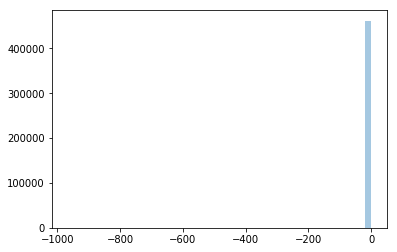

In [84]:
sns.distplot(diff_DF_flattened,kde=False)

In [30]:
max(x)

4343.5

In [32]:
min(x)

-2341.5100000000002

In [58]:
-1.454710e+09

-1454710000.0

In [90]:
# Look for ribosomal RNAs
feature_readCounts.loc['NR_137294',:]

KeyError: u'the label [NR_137294] is not in the [index]'